In [ ]:
import numpy as np
import glob
import collections
import warnings
warnings.filterwarnings('ignore')
import random
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import rc
# rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})/

In [ ]:
experi = {}
allN = set()
allM = set()
for N in [10, 20, 50, 100, 500, 800, 1000]:
    path = glob.glob('./N_'+str(N)+'_png/*seed_[0-9].png') \
        + glob.glob('./N_'+str(N)+'_png/*seed_[0-9]_true.png')

    for p_ in path:
        params = p_.split('/')[-1].replace('.png', '').split('_')
        
        N_, M_, P_, seed_ = int(params[1]), int(params[3]), int(params[5]),  int(params[7])
        if (N_, M_) not in experi:
            experi[(N_, M_)] = {}
        if P_ not in experi[(N_, M_)]:
            experi[(N_, M_)][P_] = np.ones((20, ), dtype = int) * np.nan
            
        if experi[(N_, M_)][P_][seed_] > 0:
            continue
        else:
            experi[(N_, M_)][P_][seed_] = int(params[-1] == 'true')
        
        if N_ not in allN:
            allN.add(N_)
        if M_ not in allM:
            allM.add(M_)
            
    for (N_, M_) in experi:
        
        
        for P_ in experi[(N_, M_)]:
            
            experi[(N_, M_)][P_] = experi[(N_, M_)][P_][~np.isnan(experi[(N_, M_)][P_])]
        experi[(N_, M_)] = collections.OrderedDict(sorted(experi[(N_, M_)].items()))
        
arrayN = np.array(sorted(list(allN)))
arrayM = np.array(sorted(list(allM)))
countTrialDict = {}
for N in arrayN:
    for M in arrayM:
        if (N, M) in experi:
            countTrial = []
            for k in experi[(N, M)]:
                countTrial.append((k, k/N,
                    len(experi[(N, M)][k]), sum(experi[(N, M)][k])/len(experi[(N, M)][k])))
            countTrialDict[(N, M)] = countTrial
        else:
            countTrialDict[(N, M)] = []

for (N,M) in countTrialDict:
    if M != 10:
        continue
    print('N, M:',  N, M, ' P, alpha, count, rate: ')
    print(countTrialDict[(N, M)])
    print('----')

In [5]:
# import csv
# filename = 'result.csv'
# experi_old = {}
# with open(filename, newline='') as csvfile:
#     reader = csv.reader(csvfile, delimiter=',' )
#     for j,row in enumerate(reader):
#         print(', '.join(row))
#         if j > 0:
#             if (int(row[0]), int(row[1])) not in experi_old:
#                 experi_old[(int(row[0]), int(row[1]))] = \
#                     {int(row[2]) : [int(row[i]) for i in range(5,len(row)) if row[i]!='']} 
#             else:
#                 experi_old[(int(row[0]), int(row[1]))][int(row[2])] = \
#                     [int(row[i]) for i in range(5,len(row)) if row[i]!='']
# for (N_, M_) in experi_old:
#     experi_old[(N_, M_)] = collections.OrderedDict(sorted(experi_old[(N_, M_)].items()))        

In [6]:
# experi_old

In [7]:
# for (N, M) in experi_old:
#     if (N, M) not in experi:
#         experi[(N, M)] = experi_old[(N, M)]
# allM.add(5)

N, M: 10 10  P, alpha, count, rate: 
[(30, 3.0, 10, 0.8), (40, 4.0, 10, 0.6), (50, 5.0, 10, 0.4), (60, 6.0, 10, 0.3)]
----
N, M: 20 10  P, alpha, count, rate: 
[(110, 5.5, 10, 0.9), (130, 6.5, 10, 0.5), (140, 7.0, 10, 0.5), (150, 7.5, 10, 0.0)]
----
N, M: 50 10  P, alpha, count, rate: 
[(400, 8.0, 10, 0.8), (450, 9.0, 10, 0.7), (500, 10.0, 10, 0.0)]
----
N, M: 100 10  P, alpha, count, rate: 
[(950, 9.5, 10, 0.7), (1000, 10.0, 10, 0.6), (1050, 10.5, 10, 0.5), (1100, 11.0, 10, 0.3)]
----
N, M: 500 10  P, alpha, count, rate: 
[(6500, 13.0, 10, 0.8), (6800, 13.6, 10, 0.2)]
----
N, M: 800 10  P, alpha, count, rate: 
[(10800, 13.5, 10, 1.0), (11200, 14.0, 5, 1.0), (11600, 14.5, 5, 0.2), (12000, 15.0, 5, 0.0)]
----
N, M: 1000 10  P, alpha, count, rate: 
[(14000, 14.0, 8, 0.875), (14500, 14.5, 8, 0.0), (15000, 15.0, 8, 0.0), (15500, 15.5, 8, 0.0)]
----


In [ ]:

plt.figure(figsize = (5, 12),dpi=300)
plt.plot([3,14],[.5,.5],'k--')  
c = ['tab:blue','tab:orange', 'tab:green', 'tab:red',\
     'tab:purple', 'tab:brown','tab:pink']

arrayN = np.array(sorted(list(allN)))
arrayM = np.array(sorted(list(allM)))
capacity = {}
for count, (N, M) in enumerate(experi):
    if M not in [2,3,5]:
        continue
    if M not in capacity:
        capacity[M] = []
        
    sample = 100
    psedoC = []
    for i in range(sample):
        psedoX = []
        psedoY = []
        
        for P in experi[(N, M)]:
            psedoX += ([P/N] * len(experi[(N, M)][P]))
            psedoY += random.choices(experi[(N, M)][P], k=len(experi[(N, M)][P]))
        if min(psedoY) == max(psedoY):
            continue
        clf = LogisticRegression().fit(np.array(psedoX).reshape(-1, 1), np.array(psedoY))
        newX = np.linspace(min(experi[(N, M)].keys())/N, max(experi[(N, M)].keys())/N,20)
        if  np.abs(-clf.intercept_[0] / clf.coef_[0][0] ) > 20:
            continue
        psedoC.append( -clf.intercept_[0] / clf.coef_[0][0])
        
        
        probs = clf.predict_proba(newX.reshape(-1, 1))
        
        plt.subplot(arrayM.size,1, np.where(arrayM == M)[0][0] + 1)
        plt.plot(newX, probs[:,1], alpha = .15, linewidth = .5, \
                color = c[np.where(arrayN == N)[0][0]])
        
    capacity[M].append( [N, M, np.nanmean(np.array(psedoC)), np.nanstd(np.array(psedoC))])
    
    plt.subplot( arrayM.size,1, np.where(arrayM == M)[0][0] + 1)
    plt.errorbar(np.array(list(experi[(N, M)].keys()))/N, \
             [np.mean(np.array(experi[(N, M)][P])) for P in experi[(N, M)]],\
            yerr = [np.std(np.array(experi[(N, M)][P]))/np.sqrt(len(experi[(N, M)][P])) for P in experi[(N, M)]],\
            label = 'N='+str(N),linewidth = 1,\
                 color = c[np.where(arrayN == N)[0][0]] )

    plt.errorbar([np.array(psedoC).mean()], [0.5],xerr =np.array(psedoC).std() ,\
                 fmt='o', linewidth=2, capsize = 2,\
                color = c[np.where(arrayN == N)[0][0]])
for i in range(arrayM.size):
    plt.subplot(arrayM.size,1,i + 1)
    plt.title('M = '+str(arrayM[i]), fontsize = 8)
    plt.legend()
    plt.xlim([0,16])
    plt.ylim([0,1])
    plt.plot([0,16],[.5,.5],'k--')   
    plt.grid()
    plt.xlabel('P/N', fontsize = 8)
    plt.ylabel('Success rate', fontsize = 8)
for M in capacity:
    capacity[M] = np.array(capacity[M])
capacity = collections.OrderedDict(sorted(capacity.items()))
 
plt.tight_layout()
 
plt.savefig('success_rate.pdf')
plt.show()

: 

# read two-step algorithm's result

In [25]:
experi2 = {}
path = glob.glob('./monsyn4/*[0-9].txt')
for p in path: 
    p_ = p.replace('N','_')
    p_ = p_.replace('P','_')
    p_ = p_.replace('trial','_')
    p_ = p_.split('_')
    N, P, seed = int(p_[1]), int(p_[2]), int(p_[3][0])
    
    if N not in experi2:
        experi2[N] = {}
    if P not in experi2[N]:
        experi2[N][P] = np.ones((20, ), dtype = int) * np.nan
    try:
        
        with open(p, 'r') as f:
            reader = f.read()
            experi2[N][P][seed] = (int(reader.split(',')[3]) == 0)
    except:
        continue

In [12]:
# experi2 = {}
# path = glob.glob('./monsyn4/*[0-9]_lmbdsmall.txt')
# for p in path: 
#     p_ = p.replace('N','_')
#     p_ = p_.replace('P','_')
#     p_ = p_.replace('trial','_')
#     p_ = p_.split('_')
#     N, P, seed = int(p_[1]), int(p_[2]), int(p_[3][0])
    
#     if N not in experi2:
#         experi2[N] = {}
#     if P not in experi2[N]:
#         experi2[N][P] = np.ones((20, ), dtype = int) * np.nan
#     try:
#         with open(p, 'r') as f:
#             reader = f.read()
            
#             experi2[N][P][seed] = (int(reader.split(',')[3]) == 0)
#     except:
#         continue

In [26]:
for N in experi2:
    
    experi2[N] = collections.OrderedDict(sorted(experi2[(N)].items()))  
    for P in experi2[N]:
        experi2[N][P] = experi2[N][P][~np.isnan(experi2[N][P])]

In [27]:
experi2 =  collections.OrderedDict(sorted(experi2.items()))  

In [28]:
experi2

OrderedDict([(10,
              OrderedDict([(30,
                            array([1., 1., 0., 1., 1., 1., 1., 1., 1., 0.])),
                           (40,
                            array([1., 1., 0., 0., 1., 0., 1., 1., 1., 1.])),
                           (45,
                            array([0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])),
                           (50,
                            array([1., 1., 0., 1., 0., 0., 1., 0., 1., 0.])),
                           (55,
                            array([0., 0., 0., 1., 0., 1., 1., 0., 0., 0.])),
                           (60,
                            array([1., 1., 1., 0., 0., 0., 1., 1., 0., 0.])),
                           (80,
                            array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]))])),
             (20,
              OrderedDict([(120,
                            array([0., 0., 1., 0., 1., 1., 0., 1., 1., 1.])),
                           (130,
                            array([1., 1., 0., 

In [24]:
# experi2[2000] = collections.OrderedDict([(32000, np.array([ 1., 1., 1., 1., 1.])),
#              (33000, np.array([1., 1., 1., 1., 1., 1.])),
#              (34000, np.array([0.])),
#              (35000, np.array([0., 0., 0., 0., 0., 0.])),
#              (38000, np.array([0., 0., 0., 0., 0.]))])

In [30]:
effM = {}# effective steps for two-step algorithms
for N in experi2:
    if N == 2000 or N = 5000:
        continue
    if N not in effM:
        
        effM[N] = []
    for P in experi2[N]:
        seeds = np.where(experi2[N][P] == 1.)[0]
#         print(seeds)
        if seeds.size == 0:
            continue
        actv = []
        for seed in seeds: 
            with open('./monsyn4/N'+str(N)+'P'+str(P)+'trial'+str(seed)+'func.txt', 'r') as f:
                line = f.readline()
                while line:
                    line = line.replace(' \n','')
                    actv.append([float(a) for a in line.split(' ')])
                    line = f.readline()

        actv = np.array(actv)
        step = (np.diff(actv, axis = 1) > 0.01).sum(axis = 1)

        effM[N].append(step)

        print([N])

[10]
[10]
[10]
[10]
[10]
[10]
[10]
[20]
[20]
[20]
[20]
[20]
[20]
[50]
[50]
[50]
[50]
[100]
[100]
[100]
[100]
[500]
[500]
[500]
[1000]
[1000]
[1000]


FileNotFoundError: [Errno 2] No such file or directory: './monsyn4/N5000P85000trial0func.txt'

In [32]:
effM,effM2

({10: [array([1, 2, 3, 4, 2, 2, 5, 4, 3, 1, 1, 2, 3, 4, 2, 2, 5, 4, 3, 1, 3, 2,
          3, 3, 2, 3, 2, 1, 1, 1, 1, 1, 2, 2, 3, 1, 2, 3, 2, 4, 2, 2, 4, 1,
          4, 3, 1, 4, 2, 3, 3, 4, 2, 4, 2, 2, 2, 2, 1, 3, 1, 1, 1, 1, 2, 4,
          3, 4, 2, 3, 3, 1, 2, 2, 4, 4, 3, 4, 3, 2]),
   array([2, 2, 4, 1, 4, 3, 4, 3, 3, 2, 2, 2, 4, 1, 4, 3, 4, 3, 3, 2, 2, 5,
          2, 6, 4, 1, 1, 4, 3, 3, 3, 3, 1, 1, 3, 2, 3, 3, 3, 3, 4, 1, 3, 3,
          2, 4, 3, 3, 4, 2, 0, 1, 2, 4, 2, 5, 2, 4, 1, 5, 3, 2, 3, 3, 4, 2,
          0, 4, 2, 2]),
   array([2, 4, 6, 3, 5, 3, 1, 2, 4, 1, 4, 1, 2, 1, 4, 4, 2, 4, 4, 5, 3, 2,
          4, 4, 1, 5, 2, 1, 6, 3]),
   array([3, 2, 5, 4, 3, 2, 4, 3, 5, 3, 3, 2, 5, 4, 3, 2, 4, 3, 5, 3, 6, 4,
          1, 4, 2, 4, 4, 2, 3, 2, 3, 4, 4, 4, 5, 1, 3, 4, 5, 5, 4, 1, 3, 4,
          1, 1, 4, 4, 5, 4]),
   array([4, 3, 4, 2, 4, 3, 3, 2, 2, 3, 1, 5, 4, 6, 3, 3, 3, 2, 4, 3, 4, 4,
          5, 2, 5, 6, 4, 1, 4, 4]),
   array([3, 3, 2, 3, 3, 2, 5, 6, 4, 6, 3, 3, 2, 3, 3, 2

In [37]:
effM.keys(), effM2

(dict_keys([10, 20, 50, 100, 500, 1000, 5000]),
 [[3.0125, 1.3415825542992128],
  [4.069230769230769, 1.6109646490819456],
  [4.8533333333333335, 1.8328778655003912],
  [5.316470588235294, 1.9979016674161818],
  [6.068344827586207, 2.07549363095347],
  [6.4044, 2.1516413827587533]])

In [33]:

effM2 = []
for N in effM:
    if N == 5000:
        continue
    effM2.append([np.array(np.hstack(effM[N])).mean(), np.array(np.hstack(effM[N])).std()])
    

ValueError: 'x' and 'y' must have the same size

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

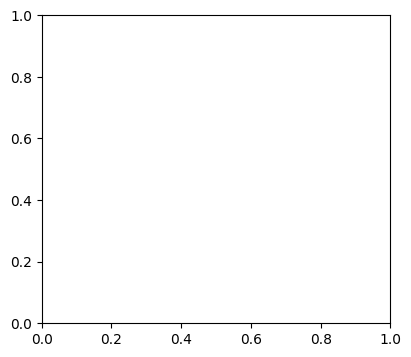

In [34]:
plt.figure(figsize = (4.5, 4.))
plt.errorbar(effM.keys(), np.array(effM2)[:, 0], yerr=np.array(effM2)[:, 1], fmt='o')

plt.xscale('log')
plt.xlabel('N')
plt.title('effective number of parallel synapses')
plt.savefig('effectms.pdf')

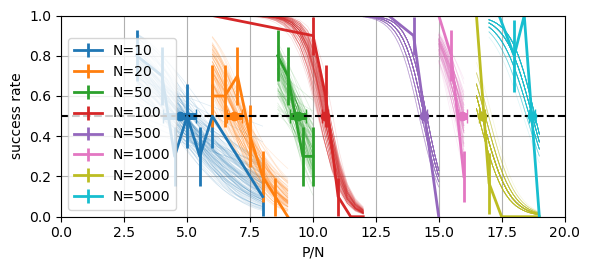

In [27]:
plt.figure(figsize = (6, 2.8))
 
c = ['tab:blue','tab:orange', 'tab:green', 'tab:red',\
     'tab:purple', 'tab:brown','tab:pink', 'tab:olive', 'tab:cyan']

arrayN = np.array([10, 20, 50, 100,500, 800,1000, 2000, 5000])
capacityms = []
for count, N in enumerate(experi2): 
    
    sample = 100
    psedoC = []
    for i in range(sample):
        psedoX = []
        psedoY = []
        
        for P in experi2[N]:
            psedoX += ([P/N] * len(experi2[N][P]))
            psedoY += random.choices(experi2[N][P], k=len(experi2[N][P]))
        if min(psedoY) == max(psedoY):
            continue
        clf = LogisticRegression().fit(np.array(psedoX).reshape(-1, 1), np.array(psedoY))
        newX = np.linspace(min(experi2[N].keys())/N, max(experi2[N].keys())/N,20)
        if  np.abs(-clf.intercept_[0] / clf.coef_[0][0] ) > 20:
            continue
        psedoC.append( -clf.intercept_[0] / clf.coef_[0][0])
        
        
        probs = clf.predict_proba(newX.reshape(-1, 1))
        
        plt.plot(newX, probs[:,1], alpha = .15, linewidth = .5, \
                color = c[np.where(arrayN == N)[0][0]])
        
    capacityms.append( [N, np.array(psedoC).mean(), np.array(psedoC).std()])
    
    plt.errorbar(np.array(list(experi2[N].keys()))/N, \
             [np.mean(np.array(experi2[N][P])) for P in experi2[N]],\
            yerr = [np.std(np.array(experi2[N][P]))/np.sqrt(len(experi2[N][P])) for P in experi2[N]],\
            label = 'N='+str(N),linewidth = 2,\
                 color = c[np.where(arrayN == N)[0][0]] )

    plt.errorbar([np.array(psedoC).mean()], [0.5],xerr =np.array(psedoC).std() ,\
                 fmt='o', linewidth=5, capsize = 5,\
                color = c[np.where(arrayN == N)[0][0]])

capacityms = np.array(capacityms)
plt.legend()
plt.xlim([0,20])
plt.ylim([0,1])
plt.plot([0,20],[.5,.5],'k--')   
plt.grid()
plt.xlabel('P/N')
plt.ylabel('success rate')

# capacity = collections.OrderedDict(sorted(capacity.items()))
 
plt.tight_layout()
 
plt.savefig('capacityms.pdf')
plt.show()

In [ ]:
arrayN, N

# plot final result

[  10.   20.   50.  100.  500.  800. 1000.] [2.83504242 4.23350971 5.7929676  5.88643749 6.43181484        nan
 6.42857772] [0.38387251 0.40547472 0.18260819 0.16776194 0.0831596         nan
 0.04738091]
[  10.   20.   50.  100.  500. 1000.] [3.338317   6.13999028 7.32154827 8.11974002 8.67679951 8.6909307 ] [0.46345814 0.19275032 0.11323901 0.18313392 0.         0.05693201]
[  10.   20.  100.  500.  800. 1000.] [ 4.06836128  6.57387236  9.94257438 10.81050231 11.73384906 12.07251268] [4.67693530e-01 1.90621750e-01 3.06759465e-01 2.95260486e-01
 7.10542736e-15 1.19449556e-01]
[  10.   20.   50.  100.  500.  800. 1000.] [ 4.19515046  6.78528908  9.54065392 11.2709339  14.26921071 14.58706191
         nan] [2.43598917 0.2102975  0.20784044 0.21837047 0.12700232 0.15711998
        nan]


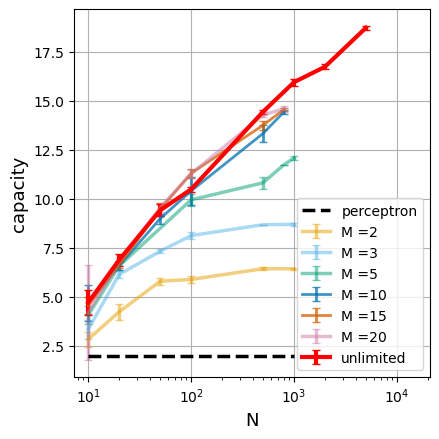

In [38]:
ax = plt.figure(figsize = (4.5,4.5))
color =  ["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
# plt.errorbar(capacity1[:, 0], capacity1[:, 2], yerr = capacity1[:, 3], capsize = 2, color = 'k', label = 'M = 5')
for i, M in enumerate(capacity):
    # if M!=10:
    #     continue
    if M == 15:
        plt.errorbar(capacity[M][:-1, 0], capacity[M][:-1, 2], yerr =capacity[M][:-1, 3], \
                 capsize = 3, color =color[i] , label = 'M ='+str(M), linewidth = 2,alpha = .75)
        continue
    if M == 10:
        plt.errorbar(capacity[M][:-1, 0], capacity[M][:-1, 2], yerr =capacity[M][:-1, 3], \
                 capsize = 3, color =color[i] , label = 'M ='+str(M), linewidth = 2,alpha = .75)
        continue
        
#         continue
# #     if M==3:
# #         plt.errorbar(capacity[M][:5, 0], capacity[M][:5, 2], yerr =capacity[M][:5, 3], \
# #                  capsize = 3, color =color[i] , label = 'M ='+str(M), linewidth = 2,alpha = .6)
# #         continue
    x, y, yerr = capacity[M][:, 0], capacity[M][:, 2], capacity[M][:, 3]
    print(x, y, yerr)
    plt.errorbar(x[~np.isnan(y)], y[~np.isnan(y)], yerr =yerr[~np.isnan(y)], \
                 capsize = 3, color =color[i] , label = 'M ='+str(M), linewidth = 2.5 ,alpha = .5)
plt.errorbar(capacityms[:, 0], capacityms[:, 1], yerr =capacityms[:, 2], \
                 capsize = 3, color = 'r' , label = 'unlimited', linewidth = 3)
plt.plot(np.logspace(1,3,5), np.ones((5,))*2,'k--', linewidth = 2.5, label = 'perceptron')
plt.xscale('log') 
# plt.yscale('log') 
# plt.xticks([0 + i*100 for i in range(12)])
plt.grid()

plt.xlabel('N', fontsize =13)
plt.ylabel('capacity', fontsize =13)
# plt.ylim([1.5,17])
plt.xlim([-10,2.1e4])
plt.legend(ncol=1,prop={'size':10})
# plt.grid()

plt.tight_layout()

plt.savefig('capacity_two.pdf')

In [21]:
capacity

OrderedDict([(2,
              array([[1.00000000e+01, 2.00000000e+00, 2.83301135e+00, 4.07504629e-01],
                     [2.00000000e+01, 2.00000000e+00, 4.10201542e+00, 5.77134490e-01],
                     [5.00000000e+01, 2.00000000e+00, 5.79078462e+00, 1.80850432e-01],
                     [1.00000000e+02, 2.00000000e+00, 5.90328912e+00, 1.43364516e-01],
                     [5.00000000e+02, 2.00000000e+00, 6.43482750e+00, 6.87593825e-02],
                     [8.00000000e+02, 2.00000000e+00,            nan,            nan],
                     [1.00000000e+03, 2.00000000e+00, 6.34039228e+00, 2.66453526e-15]])),
             (3,
              array([[1.00000000e+01, 3.00000000e+00, 3.39397158e+00, 4.27876344e-01],
                     [2.00000000e+01, 3.00000000e+00, 6.13816410e+00, 1.85994090e-01],
                     [5.00000000e+01, 3.00000000e+00, 7.34372598e+00, 1.11959174e-01],
                     [1.00000000e+02, 3.00000000e+00, 8.12661360e+00, 1.85167666e-01],
      

# plot activation histogram

In [26]:
from parallel_syn_capacity_continue import *
class args():
    def init(self):
        N = 0
        M = 0
        seed = 0
        P = 0

args.N, args.M, args.seed, args.P = 1000, 5, 0, 11000
allActv = []
# for args.seed in range(10):
model_params = {
     'N': args.N, # input dimension
     'M': args.M,# parallel synapse number 
     'seed': args.seed,
     'device': torch.device('cpu')
     }   
train_params = {
          'margin': 0.1, # only applied when 'loss' is hinge
          'threslr': 1e-6,
          'adamlr': 0.003,
    'minAmpli': 1e-1,
    'Nepoch': 160000,
    'P': args.P,  
    'maxRecord': 4000,
    'downSample': 100,
    'NthresPool': int(args.P/2), 
}   
path = ''
folder = './N_'+str(model_params['N'])
# folder = './monsyn4'
#
path += 'N_'+str(model_params['N']) + '_M_'+str(model_params['M'])\
    +'_P_' +str(train_params['P'])\
    + '_seed_'+str(model_params['seed'])  

data_ = load_model(folder + '/' + path+'_data')
inputX, label = data_[:,:-1].to(model_params['device']), data_[:,-1].to(model_params['device'])


model = ParallelSyn(model_params)


state_dict = torch.load(folder + '/' + path , map_location=model_params['device'])
model.load_state_dict(state_dict) 

actv = (inputX.unsqueeze(2) - model.thres.unsqueeze(0))    
actv =  actv * model.slope.unsqueeze(0)          
actv = torch.tanh(actv)                         
actv = (model.ampli.pow(2).unsqueeze(0) * actv  ).sum(axis = -1)
allActv.append((actv.detach().numpy() - np.median(actv.detach().numpy(),axis = 0)).ravel())

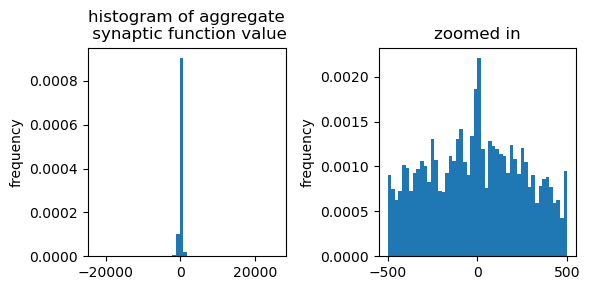

In [27]:
allActvArray = np.array(allActv)

plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plt.hist(np.array(allActv).ravel(),bins = 50, density = True) 
plt.title('histogram of aggregate\n synaptic function value')
plt.ylabel('frequency')
plt.subplot(1,2,2) 
allActvArray[np.abs(allActvArray) < .05] = np.nan
allActvArray[np.abs(allActvArray) > 500] = np.nan
 
plt.hist(allActvArray.ravel(),bins = 50, density = True) 
plt.title('zoomed in')
plt.ylabel('frequency')
plt.tight_layout()
# plt.savefig('totalactv.pdf')
plt.show()

In [ ]:
def plot_activation(model, n, file):
    nDim, nSyn = model.ampli.shape[0],  model.ampli.shape[1] 

    nX = 100
    '''
    plot the staircase functions
    '''
    thresMin = model.thres.min().item()
    thresMax = model.thres.max().item()
    x = torch.tile(torch.linspace(thresMin-1, thresMax+1, nX).unsqueeze(1), (1, nDim) )
    
#     actv = (inputX   
#              
#     a                        
#     


    actv =  x.unsqueeze(2) - model.thres.unsqueeze(0)
    actv =  actv * model.slope.unsqueeze(0) 
    actv =( torch.tanh(actv) +1 )/2
    actv = (model.ampli.pow(2).unsqueeze(0) * actv  ).sum(axis = -1)
 
        
    actv = actv.detach().numpy()
    

#     for i in range(n):
#         actv[:, i] = actv[:, i] - np.median(actv[:, i]) + np.random.rand()
    x = x[:,0]
    x = x.numpy()
#     plt.rcParams["figure.figsize"] = (8,5)
    plt.rcParams.update({'font.size': 12})
    plt.figure(figsize = (4.5, 4.5))
#     plt.subplot(1,2,1)
#     plt.plot(x, actv)
#     plt.xlabel('x')
#     plt.ylabel('activation functions')
#     if data['loss'][-1] == 0:
#         plt.title('nDimension'+str(N) +', nSynapse '+str(M)+', nSample '+str(P)+'\n successfully classify all points')
#     else:
#         plt.title('nDimension'+str(N) +', nSynapse '+str(M)+', nSample '+str(P)+ '\n failed to classify all points')
#     plt.title()
#     plt.subplot(1,2,2)
    plt.plot(x, actv[:, :n] ,linestyle = '-', alpha = .8)
    plt.xlim([-0.1,1.1])
#     plt.ylim([0,.6])
    plt.xlabel('input')
    plt.ylabel('arbitrary unit')
    plt.title('aggregate synaptic function')
    plt.tight_layout()
    plt.savefig('activation' + file + '.pdf')
    plt.show()

In [ ]:


plot_activation(model, 15, '')


In [28]:
def plot_synaptic_amplitude(model):
    nDim, nSyn = model.ampli.shape[0],  model.ampli.shape[1] 
    ampli = model.ampli.detach()
    thres = model.thres.detach()
    plt.figure(figsize = (4.5,4.5))
    plt.hist(ampli.ravel(), bins = 20, label = 'all')
    plt.hist(ampli[np.abs(thres - 0.5) > 0.45].ravel(), bins = 20,alpha = .9, label = 'thres. close to 0/1 within 0.05')
    plt.hist(ampli[np.abs(thres - 0.5) > 0.49].ravel(), bins = 20,alpha = .8, label = 'thres. close to 0/1 within 0.01')
    plt.legend()
    plt.show()

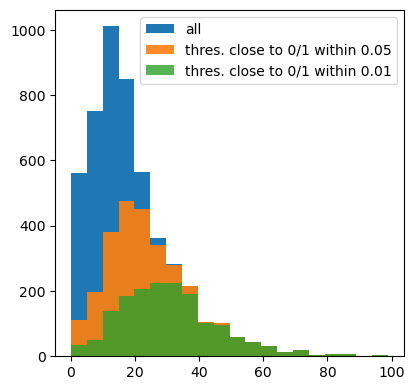

In [29]:
plot_synaptic_amplitude(model)

In [44]:
def thres_ampli(model):
    nDim, nSyn = model.ampli.shape[0],  model.ampli.shape[1] 
    ampli = model.ampli.detach()**2
    
    thres = model.thres.detach()
    nBin = 20
    thresBin = np.linspace(thres.min(), thres.max(), nBin)
    allAmpli = []
    for i in range(1,nBin):
        ampli_ = ampli[(thres > thresBin[i-1])*(thres <= thresBin[i])]
        allAmpli.append([ampli_.mean(), ampli_.std()/np.sqrt(len(ampli_))])
    allAmpli = np.array(allAmpli)
    plt.figure(figsize = (9,3.))
    plt.subplot(1,3,1) 
#     y, bins = np.histogram(ampli.ravel(), bins = 50)
#     plt.bar(bins[1:], y/y.sum())
    plt.hist(ampli.ravel(),bins = 100)
    plt.xlabel('amplitude')
    plt.ylabel('frequency')
    plt.title('amplitude histogram')
    plt.subplot(1,3,2)
    plt.hist(thres.ravel(), bins = 50)
    # y, bins = np.histogram(thres.ravel(), bins = 50)
    # plt.bar(bins[1:], y/y.sum())
    plt.xlabel('threshold')
    plt.ylabel('frequency')
    plt.title('threshold histogram')
    
    plt.subplot(1,3,3) 
    
    plt.errorbar(thresBin[1:], allAmpli[:,0], yerr = allAmpli[:,1])
    plt.xlabel('threshold')
    plt.ylabel('amplitude ')
    plt.title('amplitude vs threshold')
    plt.tight_layout()
    plt.savefig('ampli_thres1.pdf')
    plt.show()

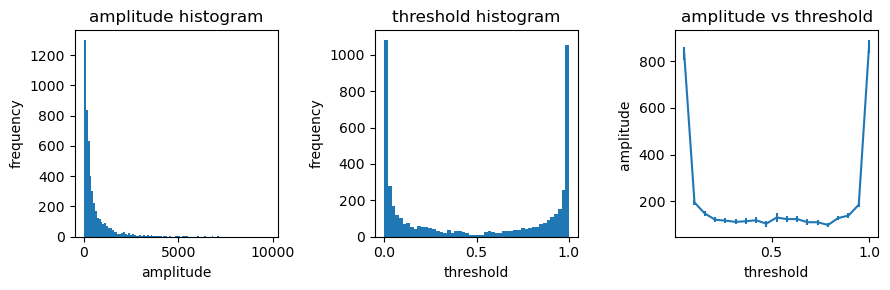

In [45]:
thres_ampli(model)

In [ ]:
def ampli_hist(model):
    ampli = model.ampli.detach().numpy() 
    plt.figure(figsize = (4.,4.))
    plt.hist(ampli.ravel(), bins = 50)
    plt.show()

In [ ]:
ampli_hist(model)

In [46]:
N = 100
P = 1000
seed = 1
actv = []
for i in range(1):

    with open('./monsyn4/N'+str(N)+'P'+str(P)+'trial'+str(i)+'func.txt', 'r') as f:
        line = f.readline()
        while line:
            line = line.replace(' \n','')
            actv.append([float(a) for a in line.split(' ')])
            line = f.readline()
        
actv = np.array(actv)

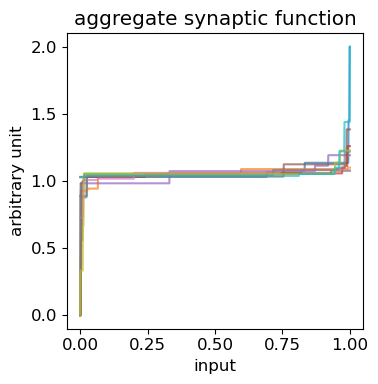

In [47]:
nShow = 10
plt.figure(figsize = (4, 4.))
plt.rcParams.update({'font.size': 12})
plt.plot(np.linspace(0, 1, P),actv[:nShow,:].T,alpha = .7)
plt.xlabel('input')
plt.ylabel('arbitrary unit')
plt.title('aggregate synaptic function')
plt.tight_layout()
plt.savefig('activation' + 'monsyn.pdf')
plt.show()


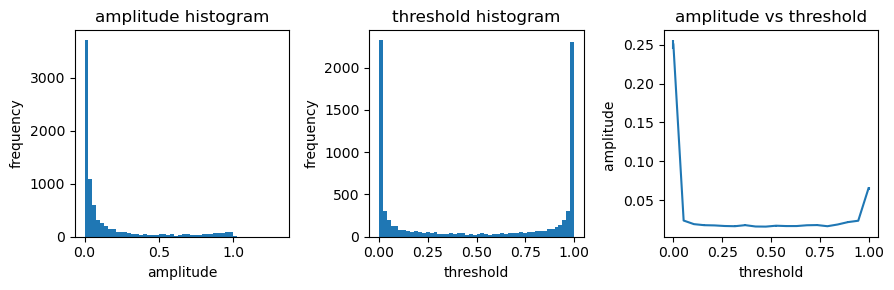

In [57]:

amp = np.diff(actv, axis = 1)
nBin = 20
ampli = []
N, P = amp.shape
step = int(P/nBin)
for i in range(nBin):
    start = i * step
    end = (i + 1) * step
    tmp = amp[:, start:end]
    ampli.append(tmp[tmp > 0.01])
thres = [np.where(amp[i,:] > 0)[0]/amp.shape[1] for i in range(amp.shape[0])]
plt.figure(figsize = (9,3.))
plt.subplot(1,3,1)
plt.hist(amp[amp > 0], bins = 50)
plt.xlabel('amplitude')
plt.ylabel('frequency')
plt.title('amplitude histogram')
plt.subplot(1,3,2)
plt.hist(np.concatenate(thres, axis = 0), bins = 50)
plt.xlabel('threshold')
plt.ylabel('frequency')
plt.title('threshold histogram')
plt.subplot(1,3,3)
plt.errorbar(np.linspace(0, 1, nBin), [amp.mean() for amp in ampli], \
             yerr = [amp.std()/np.sqrt(len(amp)) for amp in ampli])
plt.xlabel('threshold')
plt.ylabel('amplitude ')
plt.title('amplitude vs threshold')
plt.tight_layout()
plt.savefig('ampli_thres2.pdf')
plt.show()

In [ ]:
actvArray=actv

plt.figure(figsize = (3,3)) 
plt.hist(np.array(actv).ravel(),bins = 150, density = True) 
plt.title('histogram of aggregate\n synaptic function value')
plt.ylabel('frequency')

plt.tight_layout()
plt.savefig('totalactvmonsyn.pdf')
plt.show()